### Model that accurately predicts wind turbine power output from wind speed values provided in the data set

***

#### Introduction 

Wind power forecasting plays a vital role in renewable energy production. Forecasting wind energy accuretly is a significant challenge due to the unpredictable and complex behavior of wind signals. The below wind power forecast claculates an estimate expected power production for one or more wind turbines.


In [1]:
# import libraries
# Numerical arrays
import numpy as np
# Machine Learning - KMeans
import sklearn.cluster as skcl
# Import Pandas library to analyze the data
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
# More Plotting
import seaborn as sns
# Machine Learning
import sklearn.linear_model as lm
# Results evaulation:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#import Joblib library save the model as pkl file
from sklearn.externals import joblib

import operator

# to set the plot default size to be bigge
plt.rcParams['figure.figsize'] = (8, 6)


### Data import

In [2]:
# Import Dataset into Dataframe
ppdf = pd.read_csv("powerproduction.csv")
ppdf


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
# assign speed values to variable x
x = ppdf[['speed']]

In [4]:
# assign power values to variable y
y = ppdf['power']

In [5]:
# quick checks of dataset parameters
ppdf.describe()


,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


### Data analysis and visualisation

### Using statsmodel

In [6]:
import statsmodels.api as sm

#Tell statsmodel to include an intercept
xwithc = sm.add_constant(x)

#Create a model

msm = sm.OLS(y, xwithc)
#Fit the data
rsm = msm.fit()
#Print a summary
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                  power   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1339.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):          2.86e-143
Time:                        12:20:49   Log-Likelihood:                -2246.8
No. Observations:                 500   AIC:                             4498.
Df Residuals:                     498   BIC:                             4506.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.8999      1.950     -7.128      0.0

R-squared of power is equal to 0.729 and adjustable R-squared is equal to 0.728 which indicate that the linear regression predictions is not the best but different type of regression may be good fit.   
Prob(F-Statistic) tells the overall significance of the regression. The null hypothesis under this is “all the regression coefficients are equal to zero”. Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is close to zero. This implies that overall the regressions is meaningful. Lets check it on the plot.

In [7]:
#plot style
plt.style.use('ggplot')
#plot size
plt.rcParams['figure.figsize'] = (14,10)

Text(0, 0.5, 'Power (kW)')

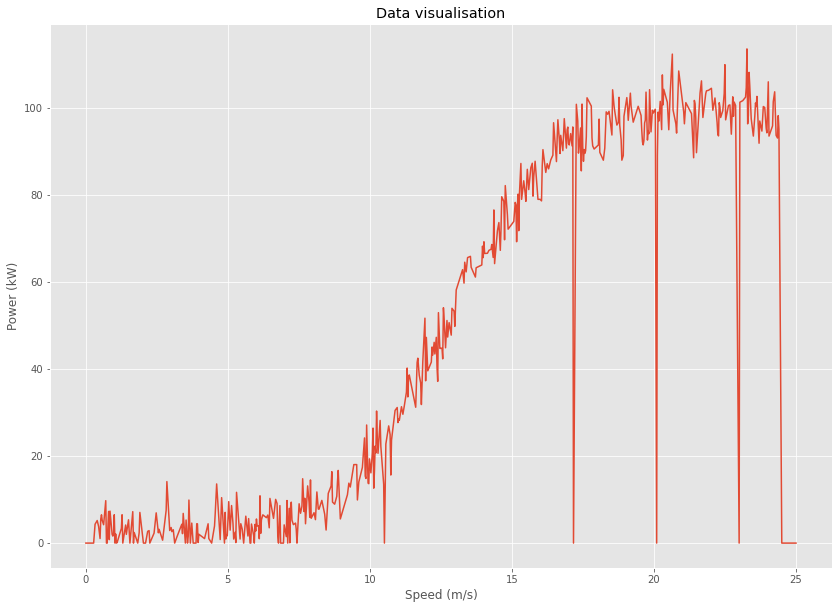

In [8]:
#Do regresssion on the x and y arrays using numpy
plt.title('Data visualisation')
plt.plot(x,y,9)
plt.xlabel('Speed (m/s)')
plt.ylabel('Power (kW)')

Observations from the data on the model:<br>
1. The data set consists of the following fields:<br>
ID - Measurement ID<br>
speed - Wind speed<br>
power - Turbine power output<br>
1. There seems to be a strong coorelation between the spped of the wind and the turbine power;<br>
2. Peaks in wind speed correspond to peaks in turbine power<br>
3. the effect of the cut-in speed is also visible (periods of zero turbine output associated with low, but non-zero wind speed).<br>
4. The distribution of the dots resemble the s shape line.<br>
5. There are visisble few outlier which suggest that at few points in time there was no turbine power output when wind speed was strong. This could reflect the turbine maintenance time. The outliers may be affecting the R square score and are not significant so lets remove them and reasses.

### Data cleansing
    

In [9]:
# remove instances where the power output is zero
newdf = ppdf[ppdf['power'] !=0]

In [10]:
# assign speed values to variable nx
nx = newdf[['speed']]

In [11]:
# assign power values to variable ny
ny = newdf[['power']]

In [12]:
newdf

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


Text(0, 0.5, 'power (kW)')

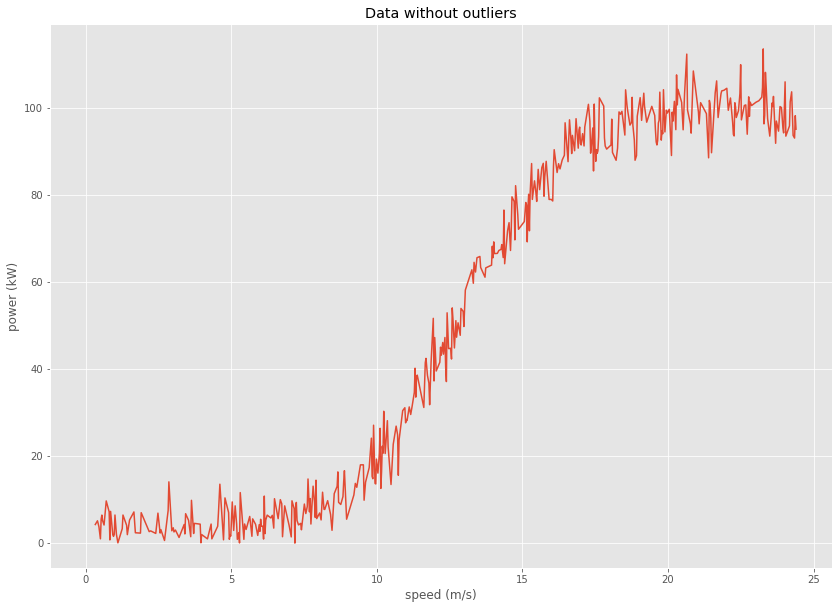

In [13]:
#Check if power output zero is removed from the regression
plt.title('Data without outliers')
plt.plot(nx,ny,9)
plt.xlabel('speed (m/s)')
plt.ylabel('power (kW)')



In [14]:
import statsmodels.api as sm

#Tell statsmodel to include an intercept
xwithc = sm.add_constant(nx)

#Create a model

msm = sm.OLS(ny, xwithc)
#Fit the data
rsm = msm.fit()
#Print a summary
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                  power   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     3974.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):          3.68e-225
Time:                        12:20:55   Log-Likelihood:                -1793.1
No. Observations:                 451   AIC:                             3590.
Df Residuals:                     449   BIC:                             3598.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.8377      1.309    -15.153      0.0

Once the outliers have been removed I have rerun OLS Regression Result and the R-squared is at 0.898 which indicate strong enough correlation between the inscrease in the wind with the increase in the power and suggests that regression model would be the right choice. Let's check the linear function to visually asses its suitability.

### Linear Regression

In [34]:
# Train test split
nx_train, nx_test, ny_train, ny_test = train_test_split(newdf.speed, newdf.power, test_size = 0.5, random_state=1)

# Convert to numpy arrays and reshape
reg_speed_train = nx_train.to_numpy().reshape(-1, 1)
reg_power_train = ny_train.to_numpy().reshape(-1, 1)
reg_speed_test  = nx_test.to_numpy().reshape(-1, 1)
reg_power_test = ny_test.to_numpy().reshape(-1, 1)


# Create model
reg_model = LinearRegression()

# Fit model
reg_model.fit(reg_speed_train, reg_power_train)

# Calculate R-squared value
score_newdf = reg_model.score(reg_speed_test, reg_power_test)

# Print score
print(score_newdf)

0.8977329624754067


Text(0.5, 1.0, 'Regular Linear Regression')

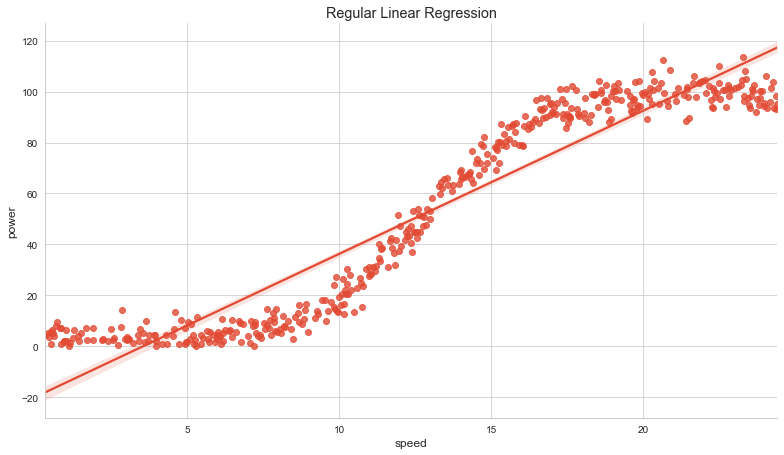

In [31]:
# visualize the dots with the straight line  
sns.set_style("whitegrid")

sns.lmplot(x='speed', y='power', data=newdf, height=6, aspect=1.8, fit_reg=True);
plt.title('Regular Linear Regression')

The distribution of the dots is not even and it resembles more a cubic than a straight line. It looks that at the top right most of the dots are above the line. In the bottem left corner most of the points are below the line. This proves that the straight line is unable to capture the patterns in the data and since the model has to be accurate no further investigation of this model will be conducted.
To generate higher order equation we can add powers of the original features as new features. In order to convert the original features into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn



### Polynomial Regression

The polynomial curve can be fitted well. Considering that we can try polynomial regression.

### Model

#### Train the data

In [16]:
# create individual dataframes for speed and power
speed_newdf = newdf.drop('power',axis='columns')
speed_newdf.head(5)

,speed
5,0.325
6,0.400
7,0.450
8,0.501
9,0.526


In [17]:
power_newdf = newdf.drop('speed',axis='columns')
power_newdf.head(5)

,power
5,4.331
6,5.186
7,3.826
8,1.048
9,5.553


In [38]:
# Call train_test_split method on dataframes (ratio:50:50) with values selected randomly
nx_train, nx_test, ny_train, ny_test = train_test_split(speed_newdf, power_newdf, test_size = 0.5, random_state=1)

# reshaping data and transforming into train and test subsets
polyn_speed_train = nx_train.to_numpy().reshape(-1, 1)
polyn_power_train = ny_train.to_numpy().reshape(-1, 1)
polyn_speed_test  = nx_test.to_numpy().reshape(-1, 1)
polyn_power_test = ny_test.to_numpy().reshape(-1, 1)

# convert the original features into higher order with polynomialFeatures class
 
polyn_features = PolynomialFeatures(degree=9, include_bias=False)

# Apply polynomial transformation of degree 9
train_speed = polyn_features.fit_transform(polyn_speed_train)

# fit the polynomial transformation to Linear Regression class
polyn_model = LinearRegression()

# Train the model with training data
polyn_model.fit(train_speed, polyn_power_train)

# predicting on training data-set
ny_train_predicted = polyn_model.predict(train_speed)

# predicting on test data-set
ny_test_predict = polyn_model.predict(polyn_features.fit_transform(polyn_speed_test))


In [40]:
# Calculate mean squared error 
mse = mean_squared_error(polyn_power_test, ny_test_predict)

# Calculate coeeficient of determination
r2 = r2_score(polyn_power_test, ny_test_predict)

# Output reults to the screen
mse, r2


(17.473901596519912, 0.9894557032616507)

In [45]:
# evaluating the model on training dataset 
mseTrain = np.sqrt(mean_squared_error(polyn_power_test, ny_test_predict))
r2Train = r2_score(polyn_power_test, ny_test_predict)

 # evaluating the model on test dataset
mseTest = mean_squared_error(polyn_power_test, ny_test_predict)
r2Test = r2_score(polyn_power_test, ny_test_predict)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(mseTrain))
print("R2 score of training set is {}".format(r2Train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(mseTest))
print("R2 score of test set is {}".format(r2Test))
print("\n")

print("-------------------------------------------")
print(f"Coefficients: {polyn_model.coef_}" )
print(f'Intercept: {polyn_model.intercept_}')

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.180179612949654
R2 score of training set is 0.9894557032616507


The model performance for the test set
-------------------------------------------
RMSE of test set is 17.473901596519912
R2 score of test set is 0.9894557032616507


-------------------------------------------
Coefficients: [[ 5.45938842e+00 -4.89386244e+00  2.04382246e+00 -4.54472807e-01
   5.68320732e-02 -4.03309386e-03  1.61289640e-04 -3.39237726e-06
   2.92157779e-08]]
Intercept: [2.50158369]


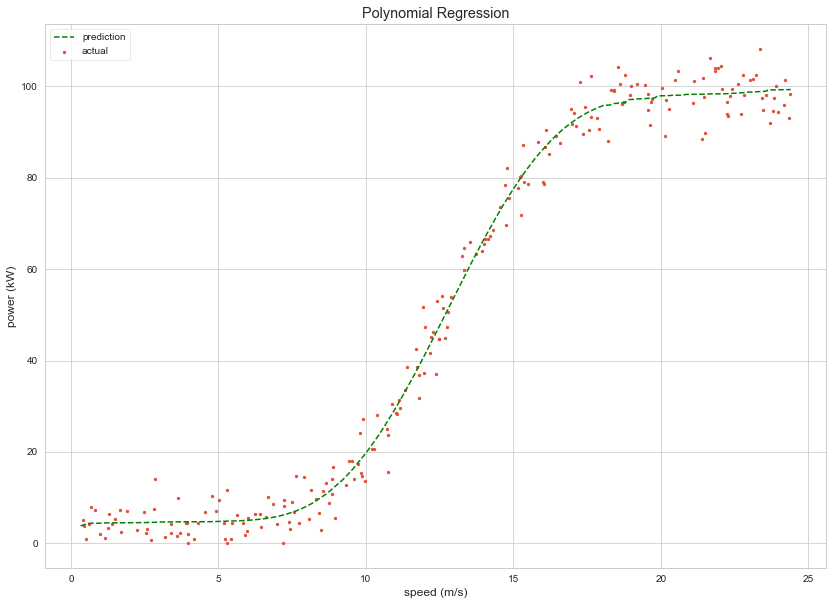

In [46]:
# Plot on scatterplot
plt.scatter(polyn_speed_train, polyn_power_train, label='actual', s=8)

sort_polyn_speed_test = np.sort(polyn_speed_test, 0)
sort_ny_test_predict = np.sort(ny_test_predict, 0)


# # Plot line based on model predictions
plt.plot(sort_polyn_speed_test, sort_ny_test_predict, '--', label='prediction', color='green')

# Labels
plt.title('Polynomial Regression')
plt.xlabel('speed (m/s)')
plt.ylabel('power (kW)')
plt.legend()

In [47]:
# Prediction
speed = 15
power = polyn_model.predict([[speed, speed ** 2, speed ** 3]])[0][0]

print(f"For a wind value of {wind} m/s, the power value predicted from the model is {power:.2f} kW")

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 3)

Looking at the Polynomial Regression plot and the R squared it looks like a good model. The quadratic curve is able to fit the data better than the linear line and R squared equals 0.99 which is nearly perfect correlation. The risk with the polynomial regression is that even though the model passes through the data, it may fail to generalize on unseen data. 

### Neuron in Keras

Keras is a deep learning API Python package, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. It is ranked as #1 for deep learning both among primary frameworks and among all frameworks used.

In [27]:
# import tensorflow, code adopted from https://keras.io/getting_started/intro_to_keras_for_engineers/
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers    

In [29]:
# Get the data as Numpy arrays
(nx_train, ny_train), (nx_test, ny_test) = keras.datasets.newdf.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
nx = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
nx = layers.Flatten()(nx)
nx = layers.Dense(128, activation="relu")(nx)
nx = layers.Dense(128, activation="relu")(nx)
outputs = layers.Dense(10, activation="softmax")(nx)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(nx_train, ny_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)

AttributeError: module 'tensorflow.keras.datasets' has no attribute 'newdf'

#### References


Forecasting Wind Power; https://lucdemortier.github.io/articles/17/WindPower
    

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

Statistics: How Should I interpret results of OLS?; jYOTI yADAV, https://medium.com/@jyotiyadav99111/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01

Using Pandas and Python to Explore Your Dataset; https://realpython.com/pandas-python-explore-dataset/
   

[1] Cheat Sheet: The pandas DataFrame Object https://www.webpages.uidaho.edu/~stevel/504/pandas%20dataframe%20notes.pdf

Don’t force your regression through zero just because you know the true intercept has to be zero; https://dynamicecology.wordpress.com/2017/04/13/dont-force-your-regression-through-zero-just-because-you-know-the-true-intercept-has-to-be-zero/

Wikipedia, Regression analysis; https://en.wikipedia.org/wiki/Regression_analysis

Polynomial Regression; Animesh Agarwal; https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

Scikit-learn: Save and Restore Models;https://stackabuse.com/scikit-learn-save-and-restore-models/